In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

def plot_results(results_csv, col_predicted='gpt_final_response', xlab='Predicted Category using GPT-4 (Zero-shot prompting)'):
    # Load CSV file into DataFrame
    if isinstance(results_csv, pd.core.frame.DataFrame):
        df = results_csv
    else:
        df = pd.read_csv(results_csv)

    # Extract ground_truth_category from video_name (first part of folder name without plurals)
    df['ground_truth_category'] = df['video_name'].str.split(r'/|_|s/', regex=True).str[0]
    
    # Create confusion matrix
    cm = pd.crosstab(df['ground_truth_category'], df[col_predicted])

    # Plot confusion matrix with Seaborn heatmap
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', linewidths=.5, cbar=False, annot_kws={"size": 14})
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0, ha='right')
    plt.xlabel(xlab, fontsize=14)
    plt.ylabel('Ground Truth Category', fontsize=14)
    plt.title('Confusion Matrix for UCF-Crime Surveilance Video Classification', fontsize=18)
    plt.show()
    
    # Compute total accuracy
    
    # Drop __invalid__ columns
    df = df[df[col_predicted] != '__invalid__']
    df = df[df[col_predicted] != '__invalid_input__']

    total_samples = len(df)
    correct_predictions = sum(df['ground_truth_category'] == df[col_predicted])
    total_accuracy = correct_predictions / total_samples

    print(f'Total accuracy: {total_accuracy:.2%} ({correct_predictions} / {total_samples})')

## GPT-4 + Human Captions

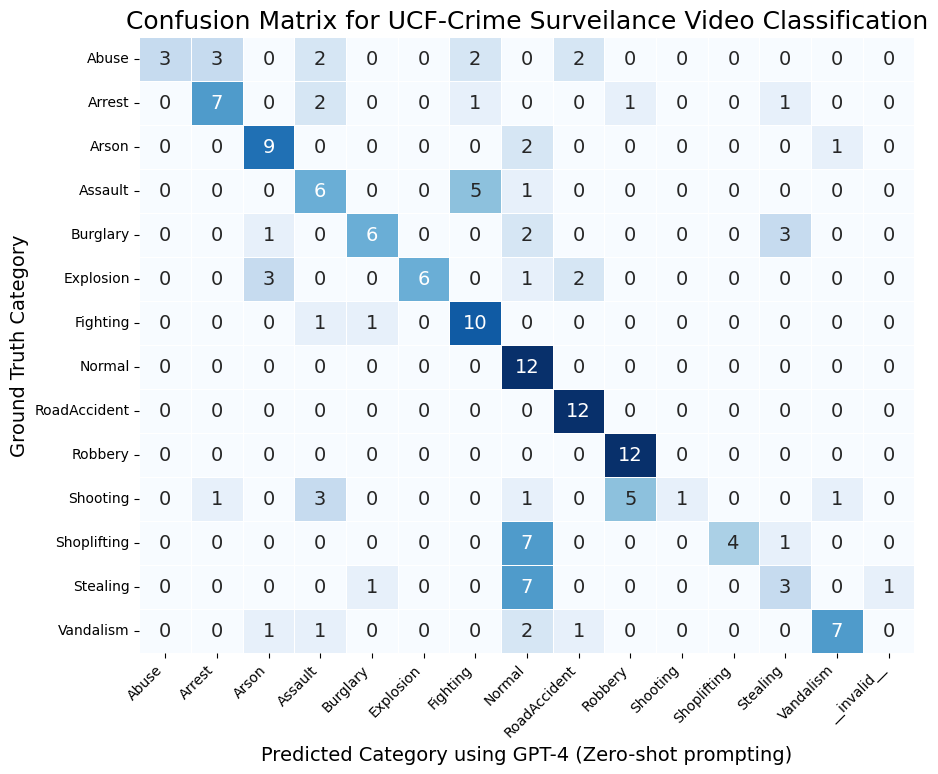

Total accuracy: 58.68% (98 / 167)


In [2]:
plot_results('output.csv')

For comparison, the baseline method in _Real-world Anomaly Detection in Surveillance Videos (2018)_ only achieves 28.4% accuracy

## GPT-4 + GIT Captions

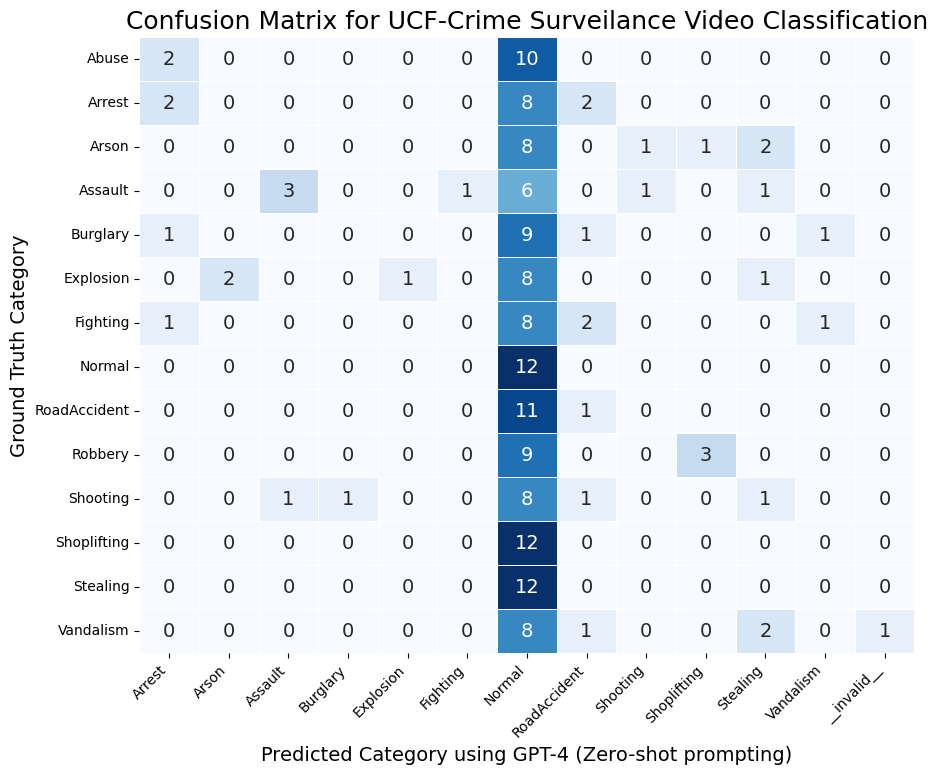

Total accuracy: 11.38% (19 / 167)


In [3]:
plot_results('output_captions.csv')

This is worse than the baseline method in _Real-world Anomaly Detection in Surveillance Videos (2018)_ which achieves 28.4% accuracy. It is only marginally better than a random baseline which achieves 1/14 = 7.1% accuracy

## GPT-4 + LLaVA Descriptions

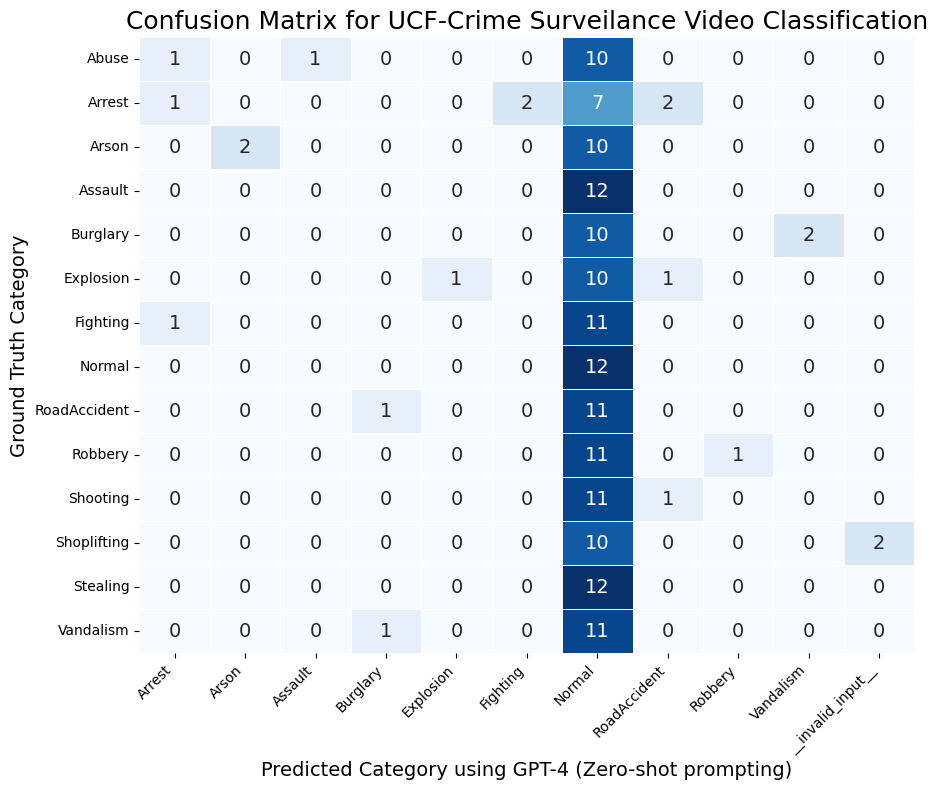

Total accuracy: 10.24% (17 / 166)


In [4]:
plot_results('output_llava.csv')

## GPT-4 + YOLO-v8 + ByteTrack

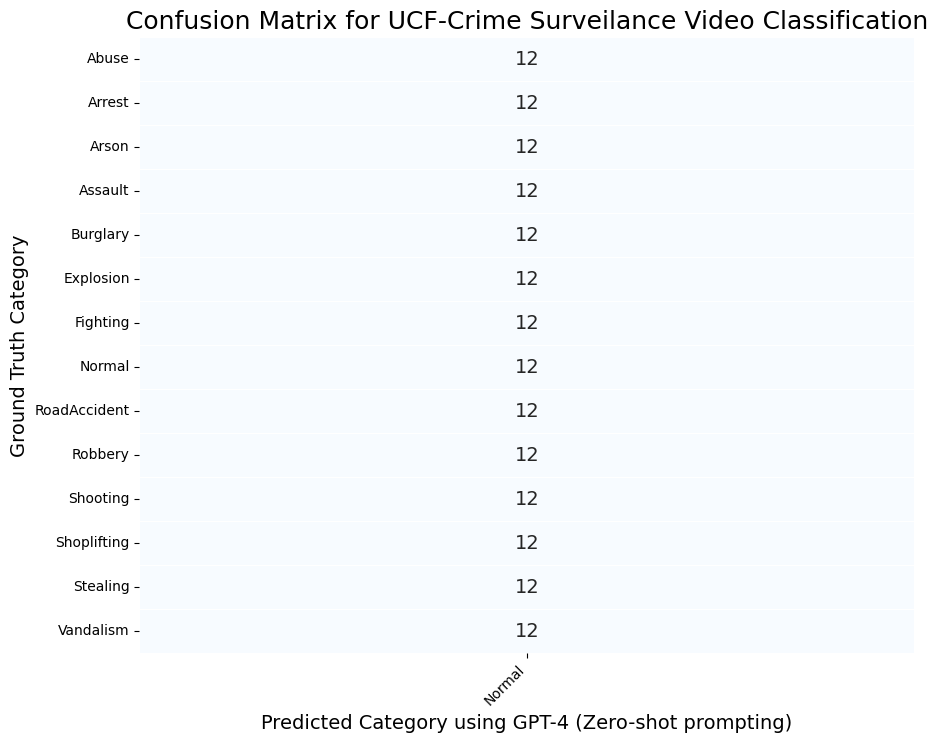

Total accuracy: 7.14% (12 / 168)


In [5]:
plot_results('output_tracks.csv')